In [422]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Machine Learning
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from scipy.stats import randint as sp_randint
from sklearn.linear_model import SGDClassifier

# Multiprocesado
import multiprocessing

# Red Neuronal
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

# Guardar Modelo
import pickle

# DATOS 0.25 SHUFFLE

In [460]:
path = "data_train.csv"

df = pd.read_csv(path)

In [461]:
np.random.seed(33)

## Análisis exploratorio de los datos EDA

Para poder entender y comprender los datos con los que vamos a trabajar debemos saber:
- Cuántas instancias y atributos hay.
- Qué tipo de atributos hay.
- Si faltan atributos.

In [214]:
df.head()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,AccX,AccY,AccZ,GyX,GyY,GyZ,TimeStamp,label
0,16881.081225,5758.496506,5567.603447,14632.455355,10568.150533,9264.403383,13063.511123,8321.187513,120.643851,154.540706,158.180277,0.011955,0.013385,0.005531,45:34.524141,4
1,16927.246217,5782.102519,5545.079707,14595.045203,10517.216567,9330.444614,13067.267777,8310.394954,121.225928,154.980194,156.558566,0.028148,0.021393,0.020431,45:34.769324,4
2,17051.103268,5857.489256,5458.398303,14471.038654,10344.640265,9547.136552,13114.995698,8272.140879,120.210833,152.164541,160.696224,0.030210,0.049329,0.045778,45:35.021519,4
3,17210.788138,6080.085143,5198.136898,14187.870212,10051.852879,9809.431514,13345.911727,8452.234633,119.508385,151.527283,161.410636,0.092142,0.044935,0.053405,45:35.270292,4
4,17425.890595,6418.491243,4843.060889,13831.015447,9720.512823,10102.031784,13650.673624,9325.751100,119.391310,157.285552,156.091366,0.040415,0.013281,0.015688,45:35.524654,4


In [215]:
print(df.shape)

(1070, 16)


Obtenemos el número de gestos realizados, `label`

In [216]:
print("Gestos :", len(df["label"].unique()))
print()

Gestos : 7



0. Reposo
1. Puño
2. Palma
3. Flexión
4. Extensión
5. Pronación
6. Supinación

Observamos que tipos de datos tenemos en cada columna de la base de datos

In [217]:
df.dtypes

CH1          float64
CH2          float64
CH3          float64
CH4          float64
CH5          float64
CH6          float64
CH7          float64
CH8          float64
AccX         float64
AccY         float64
AccZ         float64
GyX          float64
GyY          float64
GyZ          float64
TimeStamp     object
label          int64
dtype: object

Dividimos los datos en entrados y salidas, de la entrada eliminamos datos irrelevantes para el cálculo de la salida, en este caso el momento exacto, `TimeStamp`, en el que lo realiza y la propia salida, `label`.

In [462]:
X_df = df.drop(["label", "TimeStamp"], axis=1)
y_df = df["label"]

In [219]:
X_df.head()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,AccX,AccY,AccZ,GyX,GyY,GyZ
0,16881.081225,5758.496506,5567.603447,14632.455355,10568.150533,9264.403383,13063.511123,8321.187513,120.643851,154.540706,158.180277,0.011955,0.013385,0.005531
1,16927.246217,5782.102519,5545.079707,14595.045203,10517.216567,9330.444614,13067.267777,8310.394954,121.225928,154.980194,156.558566,0.028148,0.021393,0.020431
2,17051.103268,5857.489256,5458.398303,14471.038654,10344.640265,9547.136552,13114.995698,8272.140879,120.210833,152.164541,160.696224,0.030210,0.049329,0.045778
3,17210.788138,6080.085143,5198.136898,14187.870212,10051.852879,9809.431514,13345.911727,8452.234633,119.508385,151.527283,161.410636,0.092142,0.044935,0.053405
4,17425.890595,6418.491243,4843.060889,13831.015447,9720.512823,10102.031784,13650.673624,9325.751100,119.391310,157.285552,156.091366,0.040415,0.013281,0.015688


In [220]:
y_df.head()

0    4
1    4
2    4
3    4
4    4
Name: label, dtype: int64

In [221]:
X_df.describe()

,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,AccX,AccY,AccZ,GyX,GyY,GyZ
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,11094.104942,10900.379584,8006.664676,14589.914388,13224.284909,10269.465524,11859.250788,9447.178542,65.257443,163.896837,164.787576,0.043423,0.015421,0.014608
std,8591.629234,4139.519670,6842.928547,5012.185949,8127.799611,2404.700068,4583.576574,16908.508801,30.284900,42.032298,35.537970,0.101775,0.021124,0.016230
min,29.660622,2516.672068,139.751427,7299.961136,2298.784544,5501.020475,5324.578475,480.783204,2.468458,8.325124,2.190726,0.002094,0.001135,0.001064
25%,3570.698025,8504.933170,851.737638,9202.790424,4393.853989,8714.695931,7095.902675,2671.903565,45.405123,158.454682,146.511962,0.008489,0.004901,0.005267
50%,14316.422122,10057.113338,9282.764071,15825.674110,17143.082252,10352.465636,12309.729042,5680.123859,58.031766,171.364795,165.334897,0.014341,0.007937,0.008703
75%,16927.640872,12282.041061,12490.804234,18106.643498,21132.989954,12477.761688,17372.493219,7208.198876,79.268070,182.472305,179.909540,0.028138,0.017299,0.017210
max,89471.632677,23831.645247,24187.775744,25068.083853,27442.407256,14438.602934,17992.319469,156087.716611,155.544325,243.803526,252.074446,0.972397,0.234728,0.124204


Observamos si las salidas estan balanceadas

In [222]:
y_df.value_counts()

label
2    154
3    153
5    153
1    153
6    153
4    152
0    152
Name: count, dtype: int64

Observamos si hay valores nulos

In [223]:
X_df.isnull().any()

CH1     False
CH2     False
CH3     False
CH4     False
CH5     False
CH6     False
CH7     False
CH8     False
AccX    False
AccY    False
AccZ    False
GyX     False
GyY     False
GyZ     False
dtype: bool

In [224]:
X_df.isnull().sum()

CH1     0
CH2     0
CH3     0
CH4     0
CH5     0
CH6     0
CH7     0
CH8     0
AccX    0
AccY    0
AccZ    0
GyX     0
GyY     0
GyZ     0
dtype: int64

In [225]:
X_df.isnull().sum() / len(X_df) * 100

CH1     0.0
CH2     0.0
CH3     0.0
CH4     0.0
CH5     0.0
CH6     0.0
CH7     0.0
CH8     0.0
AccX    0.0
AccY    0.0
AccZ    0.0
GyX     0.0
GyY     0.0
GyZ     0.0
dtype: float64

In [226]:
y_df.isnull().any()

False

In [227]:
y_df.isnull().sum()

0

In [228]:
y_df.isnull().sum() / len(y_df) * 100

0.0

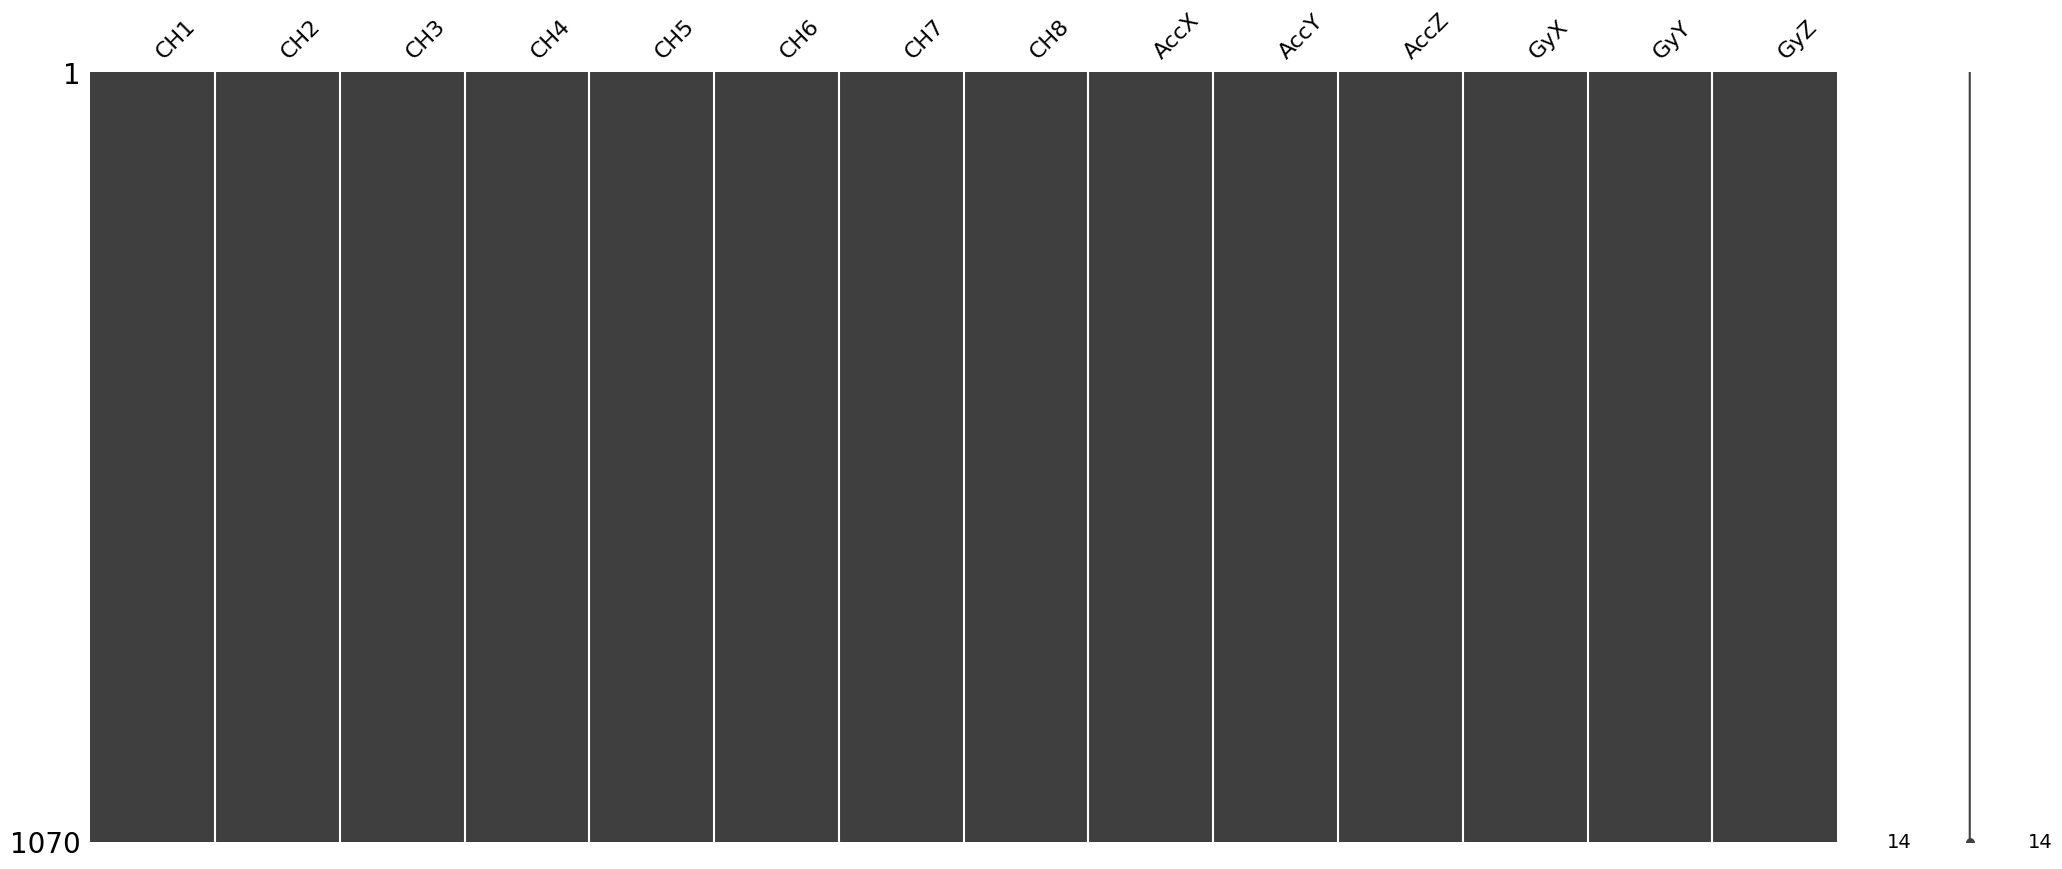

In [229]:
%config InlineBackend.figure_format = 'png'

msno.matrix(X_df)
plt.show()

Obtenemos la matriz de correlación entre las variables y la salida

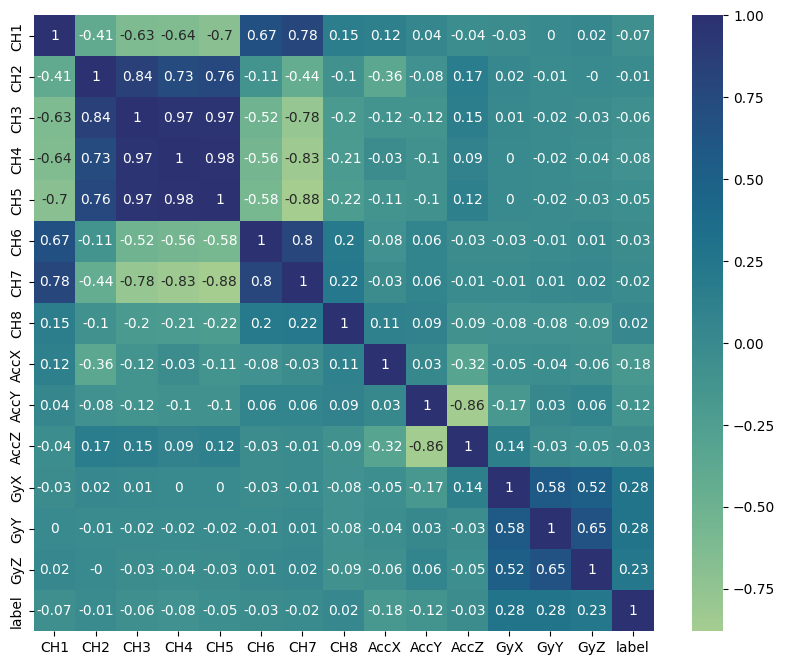

In [230]:
aux_df = df.drop(["TimeStamp"], axis=1)

plt.figure(figsize=(10, 8))

matriz_correlacion = aux_df.corr().round(2)
sns.heatmap(data=matriz_correlacion, annot=True, cmap="crest")

plt.show()

## PREPROCESADOR

Dividimos los datos en entrenamiento y test

In [463]:
x_train, x_test, y_train, y_test = train_test_split(X_df, y_df, shuffle=True, test_size=0.2)

In [464]:
num_cols = x_train.select_dtypes(exclude="object").columns

1. Realizamos un `MinMaxScaler` para transformar los datos para que se encuentren dentro de un rango entre 0 y 1.
2. Realizamos un `RobustScaler` para escalar los datos de manera robusta frente a valores atípicos.

In [465]:
num_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('scaler2', RobustScaler())
])

In [466]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols)
    ])

In [467]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                                 ('scaler2', RobustScaler())]),
                                 Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])

## RANDOM FOREST

In [236]:
random_forest_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(class_weight='balanced', random_state=33))])

In [237]:
random_forest_dist = {'classifier__n_estimators': [5, 10, 25, 50, 75, 100, 125, 150, 200, 250, 300, 350, 400, 450, 500, 550],
                      'classifier__bootstrap': [True]}

random_forest_grid = GridSearchCV(random_forest_pipe,
                                   param_grid=random_forest_dist,
                                   n_jobs = multiprocessing.cpu_count() - 1,
                                   cv=3)

np.random.seed(33)

random_forest_grid.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=33))]),
             n_jobs=19,
             param_grid={'classifier__bootstrap': [True],
                         'classifier__n_estimators': [10, 25, 50, 75, 100, 125,
                                                      150, 200, 250, 300, 350,
                                                      400, 500]})

In [238]:
resultados = pd.DataFrame(random_forest_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__bootstrap,param_classifier__n_estimators,mean_test_score,std_test_score
7,True,200,0.904171,0.021225
9,True,300,0.900667,0.023083
12,True,500,0.900667,0.024464
6,True,150,0.899505,0.017625
2,True,50,0.899501,0.019619


In [239]:
random_forest_grid.best_score_

0.9041712673291621

In [240]:
random_forest_grid.best_params_

{'classifier__bootstrap': True, 'classifier__n_estimators': 200}

In [241]:
print(random_forest_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, random_state=33))])


In [242]:
modelo_final_forest = random_forest_grid.best_estimator_
y_test_pred = modelo_final_forest.predict(x_test)

In [243]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.95      0.98        21
           2       0.92      0.88      0.90        26
           3       0.92      1.00      0.96        33
           4       0.90      0.97      0.94        38
           5       0.92      0.97      0.94        35
           6       1.00      0.77      0.87        30

    accuracy                           0.94       214
   macro avg       0.95      0.94      0.94       214
weighted avg       0.94      0.94      0.94       214



In [244]:
forest_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {forest_accuracy}")

El valor de accuracy: 0.9392523364485982


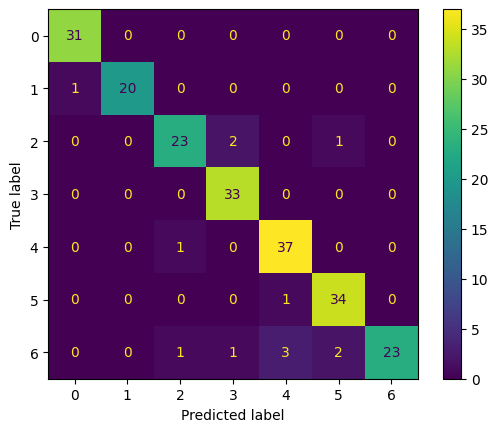

In [245]:
cm = confusion_matrix(y_test, y_test_pred, labels=random_forest_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_forest_grid.classes_)
disp.plot()
plt.show()

## LOGISTIC REGRESSION

In [246]:
pipe_scale_lr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(penalty=None, random_state = 33, class_weight='balanced'))])

In [247]:
logistic_dist = {
    'classifier__C': [1, 10, 25, 50, 75, 100, 125, 150, 175, 200],
    'classifier__penalty': [None, 'l2'],
    'classifier__solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}


logistic_grid = GridSearchCV(pipe_scale_lr,
                    param_grid = logistic_dist,
                    scoring='balanced_accuracy',
                    cv=3,
                    refit=True,
                    n_jobs=-1,
                    verbose=1,
                    return_train_score=True,)

np.random.seed(33)

logistic_grid.fit(X=x_train, y=y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        LogisticRegression(class_weight='balanced',
                                                           penalty=None,
                                                           random_state=33))]),
             n_jobs=-1,
             param_grid={'classifier__C': [1, 10, 25, 50, 75, 100, 125, 150,
                                           175, 200],
                         'classifier__penalty': [None, 'l2'],
                         'classifier__solver': ['newton-cg', 'lbfgs', 'sag',
                                                'saga']},
             return_train_score=True, scoring='balanced_accuracy', verbose=1)

In [248]:
resultados = pd.DataFrame(logistic_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__C,param_classifier__penalty,param_classifier__solver,mean_test_score,std_test_score,mean_train_score,std_train_score
36,75,l2,newton-cg,0.646375,0.027189,0.676843,0.006324
76,200,l2,newton-cg,0.646273,0.025295,0.681671,0.005447
52,125,l2,newton-cg,0.645220,0.027851,0.679862,0.006485
44,100,l2,newton-cg,0.644086,0.024849,0.679278,0.004276
68,175,l2,newton-cg,0.644029,0.026486,0.681111,0.005592


In [249]:
logistic_grid.best_params_

{'classifier__C': 75,
 'classifier__penalty': 'l2',
 'classifier__solver': 'newton-cg'}

In [250]:
logistic_grid.best_score_

0.6463753448660413

In [251]:
print(logistic_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(C=75, class_weight='balanced',
                                    random_state=33, solver='newton-cg'))])


In [252]:
modelo_final_logistic = logistic_grid.best_estimator_
print("Intercept:", modelo_final_logistic['classifier'].intercept_)
print("Coeficientes:", list(zip(df.columns, modelo_final_logistic['classifier'].coef_.flatten(), )))
print("Accuracy de test:", modelo_final_logistic.score(x_test, y_test))

Intercept: [ 0.93681846  2.18876211 -4.84614711  1.73349022  0.55517065 -2.15763749
  1.58954315]
Coeficientes: [('CH1', -2.6731231812516554), ('CH2', -1.9863095644605684), ('CH3', 6.343145807749694), ('CH4', -4.651880957225161), ('CH5', 4.620003471456163), ('CH6', 1.6489608970221774), ('CH7', 5.8968321383842355), ('CH8', -0.7626745136696128), ('AccX', 1.2717737785716954), ('AccY', 1.8113019197589122), ('AccZ', 0.08735317886148139), ('GyX', -4.401564713677367), ('GyY', -0.15637408970943187), ('GyZ', 0.7518445437361363), ('TimeStamp', 3.564627651895009), ('label', 0.2719322422225323)]
Accuracy de test: 0.6401869158878505


In [253]:
y_test_pred = modelo_final_logistic.predict(x_test)

In [254]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.48      0.65      0.55        31
           1       0.46      0.62      0.53        21
           2       0.45      0.54      0.49        26
           3       0.50      0.52      0.51        33
           4       0.79      0.50      0.61        38
           5       0.97      0.89      0.93        35
           6       1.00      0.77      0.87        30

    accuracy                           0.64       214
   macro avg       0.66      0.64      0.64       214
weighted avg       0.69      0.64      0.65       214



In [255]:
logistic_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {logistic_accuracy}")

El valor de accuracy: 0.6401869158878505


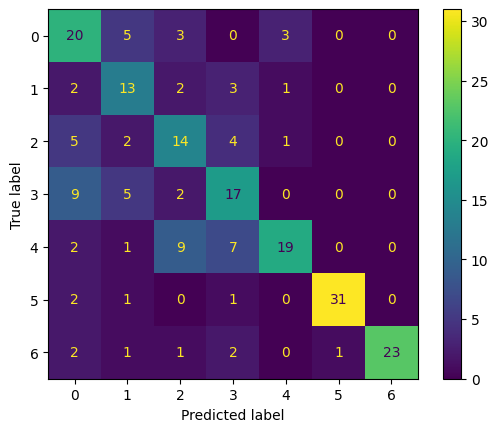

In [256]:
cm = confusion_matrix(y_test, y_test_pred, labels=logistic_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_grid.classes_)
disp.plot()
plt.show()

## BOOSTING


### HistGradientBoost

In [257]:
hist_gradient_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', HistGradientBoostingClassifier(random_state=33, 
                                                                    max_iter=1000,
                                                                    validation_fraction=0.1,
                                                                    n_iter_no_change=5,
                                                                    tol=0.0001))
                    ])

In [258]:
hist_gradient_dist = {'classifier__max_depth' : [None, 1, 3, 5, 7, 10, 25, 50, 75, 100],
              'classifier__learning_rate' : [0.01, 0.1, 0.3, 0.5, 0.7, 0.9],
              'classifier__l2_regularization' : [0, 1],
              'classifier__max_leaf_nodes': [5, 10, 25, 50, 75, 100]
             }

hist_gradient_grid = GridSearchCV(hist_gradient_pipe,
                           param_grid = hist_gradient_dist,
                           scoring='balanced_accuracy',
                           cv=3,
                           refit=True,
                           n_jobs=-1,
                           verbose=1,
                           return_train_score=True)

np.random.seed(33)

hist_gradient_grid.fit(X=x_train, y=y_train)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        HistGradientBoostingClassifier(max_iter=1000,
                                                                       n_iter_no_change=5,
                                                                       random_state=33,
                                                                       tol=0.0001))]),
             n_jobs=-1,
             param_grid={'classifier__l2_regularization': [0, 1],
                         'classifier__learning_rate': [0.01, 0.1, 0.3, 0.5, 0.7,
                                                       0.9],
                         'classifier__max_depth': [None, 1, 3, 5, 7, 10, 25, 50,
                                                   75, 100],
                         'classifier__max_leaf_nodes': [5, 10, 25, 50, 75,
                                                        100]},
             return_train_score=True, scoring='balanced_accuracy', verbose=1)

In [259]:
resultados = pd.DataFrame(hist_gradient_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__l2_regularization,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__max_leaf_nodes,mean_test_score,std_test_score,mean_train_score,std_train_score
23,0,0.01,5,100,0.926544,0.014414,1.0,0.0
22,0,0.01,5,75,0.926544,0.014414,1.0,0.0
21,0,0.01,5,50,0.926544,0.014414,1.0,0.0
20,0,0.01,5,25,0.926544,0.014414,1.0,0.0
140,0,0.3,5,25,0.923813,0.008108,1.0,0.0


In [260]:
hist_gradient_grid.best_params_

{'classifier__l2_regularization': 0,
 'classifier__learning_rate': 0.01,
 'classifier__max_depth': 5,
 'classifier__max_leaf_nodes': 25}

In [261]:
hist_gradient_grid.best_score_

0.9265438620047135

In [262]:
print(hist_gradient_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 HistGradientBoostingClassifier(l2_regularization=0,
                                                learning_rate=0.01, max_depth=5,
                                                max_iter=1000,
                                                max_leaf_nodes=25,
                                                n_iter_no_change=5,
             

In [263]:
modelo_final_hist = hist_gradient_grid.best_estimator_
y_test_pred = modelo_final_hist.predict(x_test)

In [264]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.91      1.00      0.95        21
           2       1.00      0.85      0.92        26
           3       1.00      0.97      0.98        33
           4       0.81      1.00      0.89        38
           5       0.92      0.97      0.94        35
           6       1.00      0.73      0.85        30

    accuracy                           0.93       214
   macro avg       0.95      0.93      0.93       214
weighted avg       0.94      0.93      0.93       214



In [265]:
hist_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {hist_accuracy}")

El valor de accuracy: 0.9345794392523364


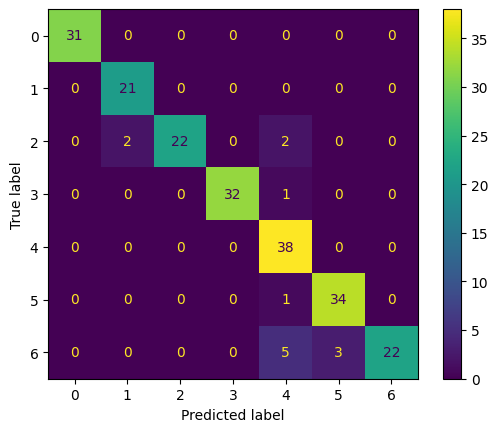

In [266]:
cm = confusion_matrix(y_test, y_test_pred, labels=hist_gradient_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=hist_gradient_grid.classes_)
disp.plot()
plt.show()

### XGBOOST

In [267]:
boost_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', XGBClassifier(random_state=33))])

In [268]:
XGBoost_dist = {'classifier__max_depth'      : [3, 5, 7, 9, 11, 13, 15, 25, 50, 75, 100],
              'classifier__subsample'        : [0.1, 0.3, 0.5, 0.7, 0.9, 1],
              'classifier__learning_rate'    : [0.1, 0.3, 0.5, 0.7, 0.9, 1],
              'classifier__n_estimators'     : sp_randint(10, 500).rvs(5)
              }

XGBoost_grid = GridSearchCV(boost_pipe,
    param_grid= XGBoost_dist,
    scoring    = 'balanced_accuracy',
    n_jobs     = multiprocessing.cpu_count() - 1,
    cv         = 3,
    refit      = True,
    verbose    = 0
)

np.random.seed(33)

XGBoost_grid.fit(X = x_train, y = y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callback...
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=33, ...))]),
             n_jobs=19,
             param_grid={'classifier__learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9,
                                                       1],
                         'classifier__max_depth': [3, 5, 7, 9, 11, 13, 15, 25,
                                                   50, 75, 100],
                         'classifier__n_estimators': array([ 30, 401, 226,  76, 156], dtype=int64),
                         'classifier__subsample': [0.1, 0.3, 0.5, 0.7, 0.9, 1]},
             scoring='balanced_accuracy')

In [269]:
resultados = pd.DataFrame(XGBoost_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__n_estimators,param_classifier__subsample,mean_test_score,std_test_score
117,0.1,9,156,0.7,0.913798,0.010252
105,0.1,9,226,0.7,0.912653,0.013474
1001,0.7,3,401,1,0.912381,0.011926
10,0.1,3,401,0.9,0.911361,0.013260
1007,0.7,3,226,1,0.910137,0.011814


In [270]:
XGBoost_grid.best_params_

{'classifier__learning_rate': 0.1,
 'classifier__max_depth': 9,
 'classifier__n_estimators': 156,
 'classifier__subsample': 0.7}

In [271]:
XGBoost_grid.best_score_

0.913797598340457

In [272]:
print(XGBoost_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=Non...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
             

In [273]:
modelo_final_xgb = XGBoost_grid.best_estimator_
y_test_pred = modelo_final_xgb.predict(x_test)

In [274]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       1.00      1.00      1.00        21
           2       0.96      0.88      0.92        26
           3       0.89      0.97      0.93        33
           4       0.86      0.95      0.90        38
           5       0.89      0.97      0.93        35
           6       1.00      0.73      0.85        30

    accuracy                           0.93       214
   macro avg       0.94      0.92      0.93       214
weighted avg       0.93      0.93      0.92       214



In [275]:
xgb_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {xgb_accuracy}")

El valor de accuracy: 0.9252336448598131


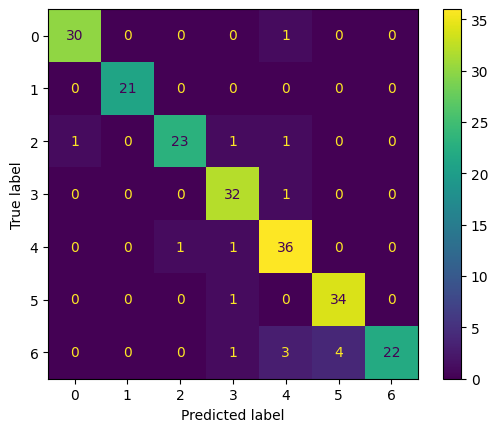

In [276]:
cm = confusion_matrix(y_test, y_test_pred, labels=XGBoost_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=XGBoost_grid.classes_)
disp.plot()
plt.show()

### LightGBM

In [277]:
light_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LGBMClassifier(random_state=33))])

In [278]:
light_dist = {
    'classifier__max_depth': [3, 5, 7, 10, 25, 50, 100],
    'classifier__subsample': [0.1, 0.3, 0.5, 0.7, 0.9, 1],
    'classifier__learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9],
    'classifier__n_estimators': sp_randint(10, 500),
    'classifier__num_leaves': [3, 5, 7, 10, 25, 50, 100],
    'classifier__boosting_type': ['gbdt', 'rf'],
    'classifier__force_col_wise': [True],
}

light_grid = RandomizedSearchCV(light_pipe,
        param_distributions= light_dist,
        scoring    = 'balanced_accuracy',
        n_jobs     =  multiprocessing.cpu_count() - 1,
        cv         = 3, 
        refit      = True,
        verbose    = 1,
        return_train_score = True,
        n_iter= 500
       )

np.random.seed(33)
light_grid.fit(X = x_train, y = y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
[LightGBM] [Info] Total Bins 3570
[LightGBM] [Info] Number of data points in the train set: 856, number of used features: 14
[LightGBM] [Info] Start training from score -1.956480
[LightGBM] [Info] Start training from score -1.869468
[LightGBM] [Info] Start training from score -1.900240
[LightGBM] [Info] Start training from score -1.964779
[LightGBM] [Info] Start training from score -2.016072
[LightGBM] [Info] Start training from score -1.981586
[LightGBM] [Info] Start training from score -1.940086
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
723 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
723 fits failed with the following error:
Traceback (most recent call last):
  File "d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\alvar\Documents\UNI\TFG\.venv\Lib\site-packages\sklearn\pipeline.py", line 427, 

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                MinMaxScaler()),
                                                                                               ('scaler2',
                                                                                                RobustScaler())]),
                                                                               Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                             ('classifier',
                                              LGBMClassifier(random_state=33))]),
                   n_iter=500...
                                        'classifier__learning_rate': [0.1, 0.3,
                                                                      0.5, 0.7,
                                                                      0.9],
                                        'classifier__max_depth': [3, 5, 7, 10,
                                                                  25, 50, 100],
                                        'classifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001690F1B0050>,
                                        'classifier__num_leaves': [3, 5, 7, 10,
                                                                   25, 50,
                                                                   100],
                                        'classifier__subsample': [0.1, 0.3, 0.5,
                                                                  0.7, 0.9,
                                                                  1]},
                   return_train_score=True, scoring='balanced_accuracy',
                   verbose=1)

In [279]:
resultados = pd.DataFrame(light_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__boosting_type,param_classifier__force_col_wise,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__n_estimators,param_classifier__num_leaves,param_classifier__subsample,mean_test_score,std_test_score,mean_train_score,std_train_score
114,gbdt,True,0.5,5,136,25,0.3,0.925241,0.001229,1.0,0.0
237,gbdt,True,0.5,5,46,25,1,0.922877,0.004556,1.0,0.0
267,gbdt,True,0.5,5,166,10,0.1,0.922032,0.002881,1.0,0.0
22,gbdt,True,0.3,5,140,50,0.5,0.921945,0.004049,1.0,0.0
316,gbdt,True,0.5,5,396,100,0.1,0.921545,0.003667,1.0,0.0


In [280]:
light_grid.best_params_

{'classifier__boosting_type': 'gbdt',
 'classifier__force_col_wise': True,
 'classifier__learning_rate': 0.5,
 'classifier__max_depth': 5,
 'classifier__n_estimators': 136,
 'classifier__num_leaves': 25,
 'classifier__subsample': 0.3}

In [281]:
light_grid.best_score_

0.9252413252258654

In [282]:
print(light_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 LGBMClassifier(force_col_wise=True, learning_rate=0.5,
                                max_depth=5, n_estimators=136, num_leaves=25,
                                random_state=33, subsample=0.3))])


In [283]:
modelo_final_light = light_grid.best_estimator_
y_test_pred = modelo_final_light.predict(x_test)

In [284]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.95      1.00      0.98        21
           2       0.96      0.92      0.94        26
           3       1.00      1.00      1.00        33
           4       0.88      0.97      0.93        38
           5       0.92      0.97      0.94        35
           6       1.00      0.80      0.89        30

    accuracy                           0.95       214
   macro avg       0.96      0.95      0.95       214
weighted avg       0.96      0.95      0.95       214



In [285]:
light_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {light_accuracy}")

El valor de accuracy: 0.9532710280373832


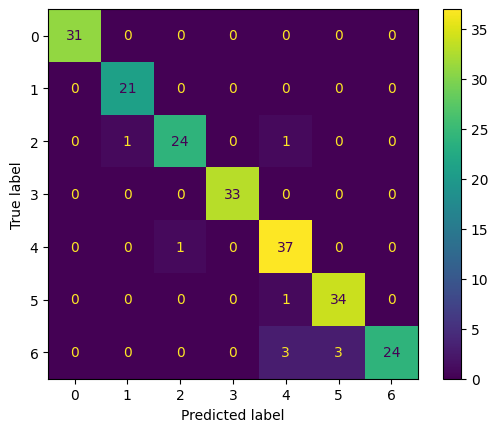

In [286]:
cm = confusion_matrix(y_test, y_test_pred, labels=light_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=light_grid.classes_)
disp.plot()
plt.show()

## SVM

In [287]:
svm_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

In [288]:
svm_param_dist = {
    'classifier__C': [ 1, 10, 25, 50, 75, 100, 125, 150, 175, 200],  
    'classifier__kernel': ['linear', 'rbf'], 
    'classifier__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 5, 10]
}

svm_grid = GridSearchCV(
    svm_pipe,
    param_grid=svm_param_dist,
    scoring='balanced_accuracy',
    n_jobs=multiprocessing.cpu_count() - 1,
    cv=3,
    refit=True,
    verbose=0
)

np.random.seed(33)

svm_grid.fit(X=x_train, y=y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier', SVC())]),
             n_jobs=19,
             param_grid={'classifier__C': [1, 10, 25, 50, 75, 100, 125, 150,
                                           175, 200],
                         'classifier__gamma': ['scale', 'auto', 0.001, 0.01,
                                               0.1, 1, 5, 10],
                         'classifier__kernel': ['linear', 'rbf']},
             scoring='balanced_accuracy')

In [289]:
resultados = pd.DataFrame(svm_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__C,param_classifier__gamma,param_classifier__kernel,mean_test_score,std_test_score
51,50,auto,rbf,0.766378,0.015576
67,75,auto,rbf,0.760477,0.018986
99,125,auto,rbf,0.759734,0.010974
105,125,0.1,rbf,0.759378,0.008663
153,200,0.1,rbf,0.759159,0.003339


In [290]:
svm_grid.best_params_

{'classifier__C': 50, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf'}

In [291]:
svm_grid.best_score_

0.7663783489566395

In [292]:
print(svm_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier', SVC(C=50, gamma='auto'))])


In [293]:
modelo_final_svm = svm_grid.best_estimator_

In [294]:
y_test_pred = modelo_final_svm.predict(x_test)

In [295]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        31
           1       0.65      0.81      0.72        21
           2       0.72      0.69      0.71        26
           3       0.68      0.85      0.76        33
           4       0.82      0.71      0.76        38
           5       0.84      0.91      0.88        35
           6       1.00      0.70      0.82        30

    accuracy                           0.80       214
   macro avg       0.81      0.80      0.79       214
weighted avg       0.82      0.80      0.80       214



In [296]:
svm_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {svm_accuracy}")

El valor de accuracy: 0.7990654205607477


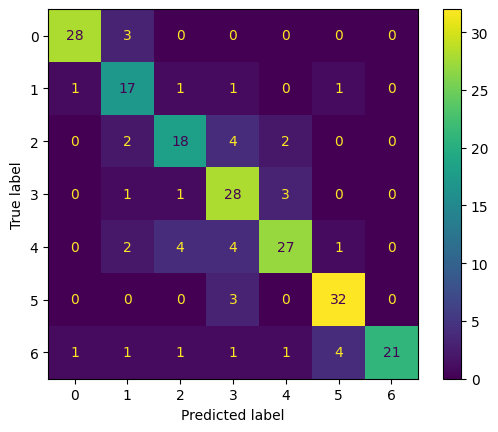

In [297]:
cm = confusion_matrix(y_test, y_test_pred, labels=svm_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_grid.classes_)
disp.plot()
plt.show()

## SGD


In [298]:
sgd_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SGDClassifier())])

In [299]:
sgd_params = {
    'classifier__alpha': [0.1, 0.01, 0.001, 0.0001, 0.00001],   
    'classifier__penalty': ['l1', 'l2', 'elasticnet', None],        
    'classifier__loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron'], 
    'classifier__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
      'classifier__eta0': [0.001, 0.01, 0.1]  
}

sgd_grid = GridSearchCV(sgd_pipe,
    param_grid=sgd_params,
    scoring='balanced_accuracy',
    n_jobs=multiprocessing.cpu_count() - 1,
    cv=3,
    refit=True,
    verbose=0
)

np.random.seed(33)

sgd_grid.fit(X=x_train, y=y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler()),
                                                                                         ('scaler2',
                                                                                          RobustScaler())]),
                                                                         Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                                       ('classifier', SGDClassifier())]),
             n_jobs=19,
             param_grid={'classifier__alpha': [0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'classifier__eta0': [0.001, 0.01, 0.1],
                         'classifier__learning_rate': ['constant', 'optimal',
                                                       'invscaling',
                                                       'adaptive'],
                         'classifier__loss': ['hinge', 'log_loss',
                                              'modified_huber', 'squared_hinge',
                                              'perceptron'],
                         'classifier__penalty': ['l1', 'l2', 'elasticnet',
                                                 None]},
             scoring='balanced_accuracy')

In [300]:
resultados = pd.DataFrame(sgd_grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head()

,param_classifier__alpha,param_classifier__eta0,param_classifier__learning_rate,param_classifier__loss,param_classifier__penalty,mean_test_score,std_test_score
869,0.0001,0.01,adaptive,modified_huber,l2,0.603957,0.023447
467,0.01,0.1,adaptive,log_loss,None,0.603166,0.028304
1110,0.00001,0.01,adaptive,modified_huber,elasticnet,0.601881,0.023456
1187,0.00001,0.1,adaptive,log_loss,None,0.601632,0.029252
871,0.0001,0.01,adaptive,modified_huber,None,0.601628,0.019881


In [301]:
sgd_grid.best_params_

{'classifier__alpha': 0.0001,
 'classifier__eta0': 0.01,
 'classifier__learning_rate': 'adaptive',
 'classifier__loss': 'modified_huber',
 'classifier__penalty': 'l2'}

In [302]:
sgd_grid.best_score_

0.6039574003686995

In [303]:
print(sgd_grid.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('scaler2',
                                                                   RobustScaler())]),
                                                  Index(['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'AccX', 'AccY',
       'AccZ', 'GyX', 'GyY', 'GyZ'],
      dtype='object'))])),
                ('classifier',
                 SGDClassifier(eta0=0.01, learning_rate='adaptive',
                               loss='modified_huber'))])


In [304]:
modelo_final_sgd = sgd_grid.best_estimator_
y_test_pred = modelo_final_sgd.predict(x_test)

In [305]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.53      0.84      0.65        31
           1       0.30      0.43      0.35        21
           2       0.42      0.54      0.47        26
           3       0.40      0.30      0.34        33
           4       0.88      0.39      0.55        38
           5       0.94      0.89      0.91        35
           6       0.81      0.73      0.77        30

    accuracy                           0.59       214
   macro avg       0.61      0.59      0.58       214
weighted avg       0.64      0.59      0.59       214



In [306]:
sgd_accuracy = accuracy_score(y_test, y_test_pred)

print(f"El valor de accuracy: {sgd_accuracy}")

El valor de accuracy: 0.5934579439252337


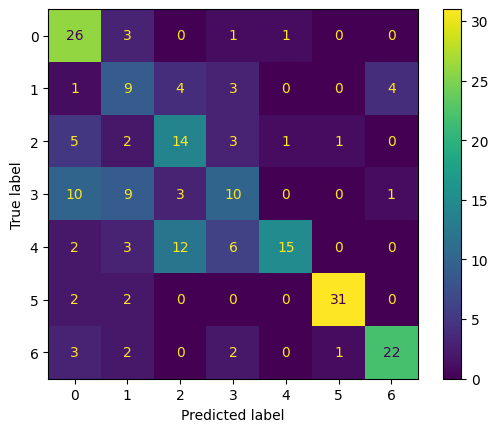

In [307]:
cm = confusion_matrix(y_test, y_test_pred, labels=sgd_grid.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sgd_grid.classes_)
disp.plot()
plt.show()

## ELECCION DEL MEJOR MODELO

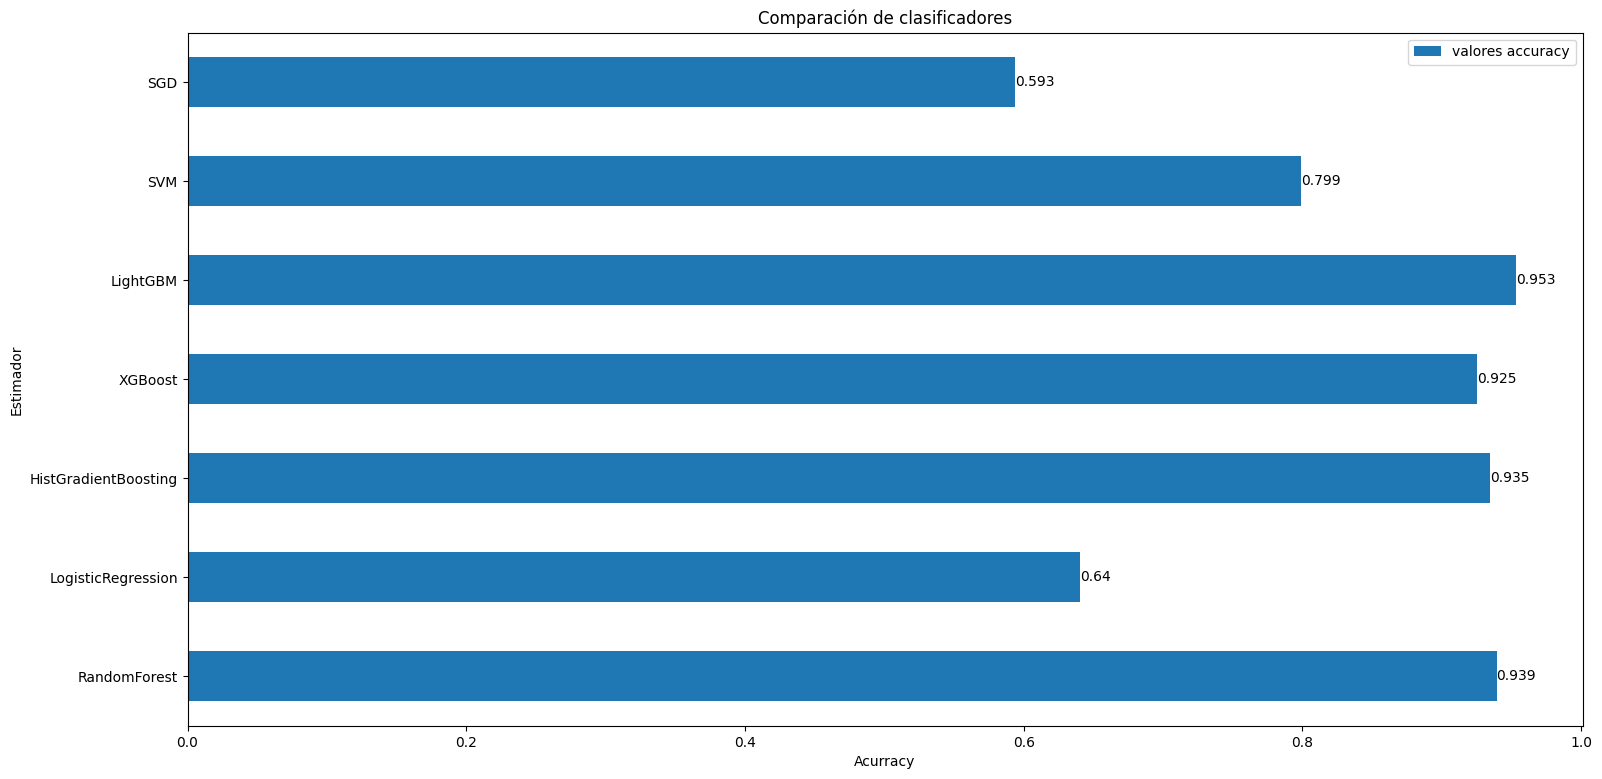

In [308]:
df_comparacion = pd.DataFrame({
                    'estimador': ['RandomForest', 'LogisticRegression', 'HistGradientBoosting', 'XGBoost', 'LightGBM', 'SVM', 'SGD'],
                    'valores accuracy': [forest_accuracy, logistic_accuracy, hist_accuracy, xgb_accuracy, light_accuracy, svm_accuracy, sgd_accuracy]
                 })

fig, ax = plt.subplots(figsize=(18, 9))
df_comparacion.set_index('estimador').plot(kind='barh', ax=ax)
ax.set_xlabel('Acurracy')
ax.set_ylabel('Estimador')
ax.set_title('Comparación de clasificadores');

for i, v in enumerate(df_comparacion['valores accuracy']):
    ax.annotate(str(round(v, 3)), xy=(v, i), va='center', ha='left', fontsize=10)

Ahora diseñamos todos los mejores modelos para probar su capacidad de generalización, con otros datos en el archivo `generalizacion.ipynb`. 

In [468]:
preprocessor = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('scaler2', RobustScaler())
])

In [475]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SGDClassifier(
        alpha = 0.0001,
        eta0 = 0.01,
        learning_rate = 'adaptive',
        loss = 'modified_huber',
        penalty = 'l2'   
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS/modelo_sgd.pkl', 'wb'))

In [469]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        bootstrap = True,
        n_estimators = 200
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS/modelo_RF.pkl', 'wb'))

In [474]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(
        C = 50,
        gamma = 'auto',
        kernel = 'rbf'
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS/modelo_SVM.pkl', 'wb'))

In [470]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        C = 75,
        penalty = 'l2',
        solver = 'newton-cg',
        class_weight='balanced'
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS/modelo_LR.pkl', 'wb'))

In [471]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', HistGradientBoostingClassifier(
        validation_fraction = 0.1,
        n_iter_no_change = 5,
        tol = 0.0001,
        l2_regularization = 0,
        learning_rate = 0.01,
        max_depth = 5,
        max_leaf_nodes = 25         
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS/modelo_HIST.pkl', 'wb'))

In [472]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        learning_rate = 0.1,
        max_depth = 9,
        n_estimators = 156,
        subsample = 0.7        
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS/modelo_XGB.pkl', 'wb'))

In [473]:
best_clas = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(
        boosting_type = 'gbdt',
        force_col_wise = True,
        learning_rate = 0.5,
        max_depth = 5,
        n_estimators = 136,
        num_leaves = 25,
        subsample = 0.3      
    ))
])

pickle.dump(best_clas.fit(x_train, y_train), open('MODELOS/modelo_LGBMC.pkl', 'wb'))

[LightGBM] [Info] Total Bins 3570
[LightGBM] [Info] Number of data points in the train set: 856, number of used features: 14
[LightGBM] [Info] Start training from score -1.956480
[LightGBM] [Info] Start training from score -1.869468
[LightGBM] [Info] Start training from score -1.900240
[LightGBM] [Info] Start training from score -1.964779
[LightGBM] [Info] Start training from score -2.016072
[LightGBM] [Info] Start training from score -1.981586
[LightGBM] [Info] Start training from score -1.940086
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos